In [1]:
import comet_ml
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from comet_ml.query import Tag
from comet_ml.query import Parameter 
from comet_ml import API


In [4]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
tagged = Tag("score")
compression_rate_params = Parameter('compression_rate')
query = ((compression_rate_params == 0) & tagged)
experiments = api.query("ohtani", "jpeg-compression", query)

In [5]:
experiments[0].get_metrics('ssim')

[{'metricName': 'ssim',
  'metricValue': '0.9994277571294945',
  'timestamp': 1635481796938,
  'step': 0,
  'epoch': None,
  'runContext': None,
  'offset': 92},
 {'metricName': 'ssim',
  'metricValue': '0.9989944311250791',
  'timestamp': 1635481797227,
  'step': 1,
  'epoch': None,
  'runContext': None,
  'offset': 98},
 {'metricName': 'ssim',
  'metricValue': '0.9983566518844447',
  'timestamp': 1635481797526,
  'step': 2,
  'epoch': None,
  'runContext': None,
  'offset': 104},
 {'metricName': 'ssim',
  'metricValue': '0.9993446092210874',
  'timestamp': 1635481797810,
  'step': 3,
  'epoch': None,
  'runContext': None,
  'offset': 110},
 {'metricName': 'ssim',
  'metricValue': '0.9990107130066942',
  'timestamp': 1635481798097,
  'step': 4,
  'epoch': None,
  'runContext': None,
  'offset': 116},
 {'metricName': 'ssim',
  'metricValue': '0.9996018902103534',
  'timestamp': 1635481798397,
  'step': 5,
  'epoch': None,
  'runContext': None,
  'offset': 122},
 {'metricName': 'ssim',


In [3]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
ssim_0_100_list = []
rmse_0_100_list = []
mae_0_100_list = []
psnr_0_100_list = []
for i in range(11):
    compression_rate = i * 10
    tagged = Tag("score")
    compression_rate_params = Parameter('compression_rate')
    query = ((compression_rate_params == compression_rate) & tagged)
    experiments = api.query("ohtani", "jpeg-compression", query)
    ssim_list = experiments[0].get_metrics("ssim")
    psnr_list = experiments[0].get_metrics("psnr")
    mae_list = experiments[0].get_metrics("mae")
    rmse_list = experiments[0].get_metrics("rmse")
    exec_command_ssim_list = 'ssim_' + str(compression_rate) + '= []' 
    exec(exec_command_ssim_list)
    exec_command_psnr_list = 'psnr_' + str(compression_rate) + '= []' 
    exec(exec_command_psnr_list)
    exec_command_mae_list = 'mae_' + str(compression_rate) + '= []' 
    exec(exec_command_mae_list)
    exec_command_rmse_list = 'rmse_' + str(compression_rate) + '= []' 
    exec(exec_command_rmse_list)
    for j in range(len(ssim_list)):
        ssim_score = ssim_list[j].get("metricValue")
        exec_command_ssim_append = 'ssim_' + str(compression_rate) + '.append(ssim_score)'
        exec(exec_command_ssim_append)

    for j in range(len(psnr_list)):
        psnr_score = psnr_list[j].get("metricValue")
        exec_command_psnr_append = 'psnr_' + str(compression_rate) + '.append(psnr_score)'
        exec(exec_command_psnr_append)

    for j in range(len(mae_list)):
        mae_score = mae_list[j].get("metricValue")
        exec_command_mae_append = 'mae_' + str(compression_rate) + '.append(mae_score)'
        exec(exec_command_mae_append)

    for j in range(len(rmse_list)):
        rmse_score = rmse_list[j].get("metricValue")
        exec_command_rmse_append = 'rmse_' + str(compression_rate) + '.append(rmse_score)'
        exec(exec_command_rmse_append)

    exec_command_ssim = 'ssim_0_100_list.append(ssim_' + str(compression_rate) + ')'
    exec(exec_command_ssim)
    exec_command_psnr = 'psnr_0_100_list.append(psnr_' + str(compression_rate) + ')'
    exec(exec_command_psnr)
    exec_command_mae = 'mae_0_100_list.append(mae_' + str(compression_rate) + ')'
    exec(exec_command_mae)
    exec_command_rmse = 'rmse_0_100_list.append(rmse_' + str(compression_rate) + ')'
    exec(exec_command_rmse)




SSIM

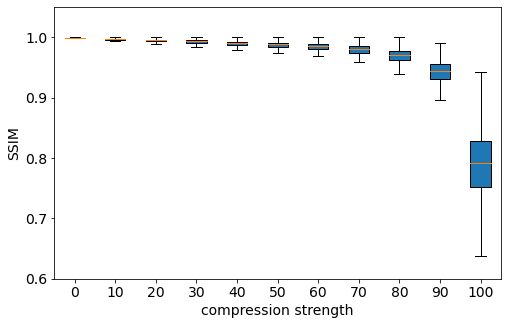

In [6]:
for i in range(len(ssim_0_100_list)):
    for j in range(len(ssim_0_100_list[i])):
        ssim_0_100_list[i][j] = float(ssim_0_100_list[i][j])

labels = list(range(0, 110, 10))
# colors = ["red", "green", "blue", "black" , "yellow" , "violet", "cyan", "gray", "coral", "indianred", "lime", "magenta"]
boxplt = plt.boxplot(ssim_0_100_list, labels=labels, showfliers=False, patch_artist=True)
plt.xlabel('compression strength')
plt.ylabel('SSIM')
# plt.title('SSIM')
plt.ylim(0.6,1.05)
parameters = {'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        "figure.figsize": (8, 5),
        }
plt.rcParams.update(parameters) 
# for b, c in zip(boxplt['boxes'], colors):
#     b.set(color=c, linewidth=1)  # boxの外枠の色
#     b.set_facecolor(c) 
plt.savefig('../images/score_fig/0_100/ssim_0_100.pdf')
plt.show()

PSNR

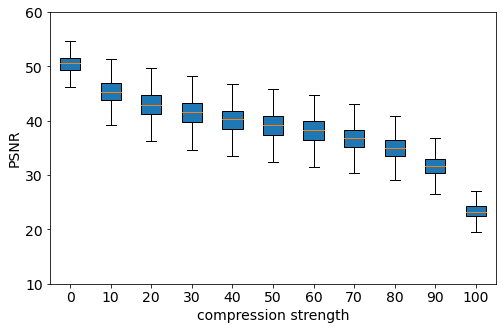

In [7]:
for i in range(len(psnr_0_100_list)):
    for j in range(len(psnr_0_100_list[i])):
        psnr_0_100_list[i][j] = float(psnr_0_100_list[i][j])

labels = list(range(0, 110, 10))
# colors = ["red", "green", "blue", "black" , "yellow" , "violet", "cyan", "gray", "coral", "indianred", "lime", "magenta"]
boxplt = plt.boxplot(psnr_0_100_list, labels=labels, showfliers=False, patch_artist=True)
plt.xlabel('compression strength')
plt.ylabel('PSNR')
# plt.title('psnr')
plt.ylim(10,60)
parameters = {'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        "figure.figsize": (8, 5),
        }
plt.rcParams.update(parameters) 
# for b, c in zip(boxplt['boxes'], colors):
#     b.set(color=c, linewidth=1)  # boxの外枠の色
#     b.set_facecolor(c) 
plt.savefig('../images/score_fig/0_100/psnr_0_100.pdf')
plt.show()

MAE

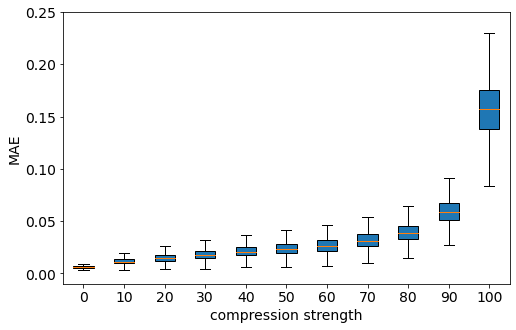

In [8]:
for i in range(len(mae_0_100_list)):
    for j in range(len(mae_0_100_list[i])):
        mae_0_100_list[i][j] = float(mae_0_100_list[i][j])

labels = list(range(0, 110, 10))
# colors = ["red", "green", "blue", "black" , "yellow" , "violet", "cyan", "gray", "coral", "indianred", "lime", "magenta"]
boxplt = plt.boxplot(mae_0_100_list, labels=labels, showfliers=False, patch_artist=True)
plt.xlabel('compression strength')
plt.ylabel('MAE')
# plt.title('mae')
plt.ylim(-0.01,0.25)
# for b, c in zip(boxplt['boxes'], colors):
#     b.set(color=c, linewidth=1)  # boxの外枠の色
#     b.set_facecolor(c) 
parameters = {'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        "figure.figsize": (8, 5),
        }
plt.rcParams.update(parameters) 
plt.savefig('../images/score_fig/0_100/mae_0_100.pdf')
plt.show()

RMSE

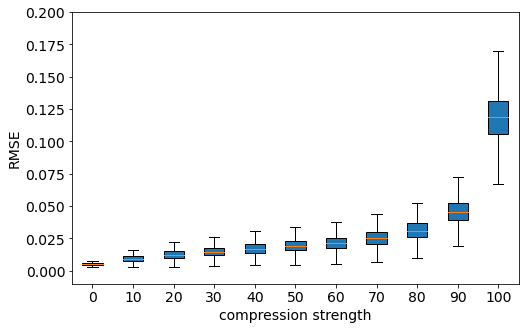

In [9]:
for i in range(len(rmse_0_100_list)):
    for j in range(len(rmse_0_100_list[i])):
        rmse_0_100_list[i][j] = float(rmse_0_100_list[i][j])

labels = list(range(0, 110, 10))
# colors = ["red", "green", "blue", "black" , "yellow" , "violet", "cyan", "gray", "coral", "indianred", "lime", "magenta"]
boxplt = plt.boxplot(rmse_0_100_list, labels=labels, showfliers=False, patch_artist=True)
plt.xlabel('compression strength')
plt.ylabel('RMSE')
# plt.title('rmse')
plt.ylim(-0.01,0.2)
# for b, c in zip(boxplt['boxes'], colors):
#     b.set(color=c, linewidth=1)  # boxの外枠の色
#     b.set_facecolor(c) 
parameters = {'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        "figure.figsize": (8, 5),
        }
plt.rcParams.update(parameters) 
plt.savefig('../images/score_fig/0_100/rmse_0_100.pdf')
plt.show()

In [57]:
np.mean(psnr_100)

inf

In [56]:
psnr_sum = 0
for i in range(len(psnr_0)):
    psnr_sum += psnr_0[i]
    print(psnr_sum)



50.90137587919159
101.2226560225429
148.368920140574
198.7430955113259
249.7521192526993
302.8003449530415
353.9049361222761
404.5992746293392
454.01438114673397
504.4686548033641
554.7052556000875
606.7631837263472
656.2465743189824
708.188360077739
760.1798954778758
808.3060127675903
856.0562347702476
907.7066599143243
953.6526678314827
1004.6711990748813
1052.3308548371247
1099.0181244739895
1151.92433151626
1201.2938733885362
1250.3565427651927
1300.9087406294852
1351.9914527886633
1400.9010997996768
1452.234927172299
1502.7542358832209
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
i

inf